## Interacting with measurements in Napari
When exploring data, it often makes sense to explore measurements as parametric images interactively.

In [1]:
import napari
from napari_simpleitk_image_processing import label_statistics, touching_objects_labeling
from napari_skimage_regionprops import add_table
from skimage.data import cells3d
from skimage.filters import gaussian
import pandas as pd

We start by loading a 3D image into napari and segmenting the nuclei.

In [2]:
import napari
viewer = napari.Viewer()

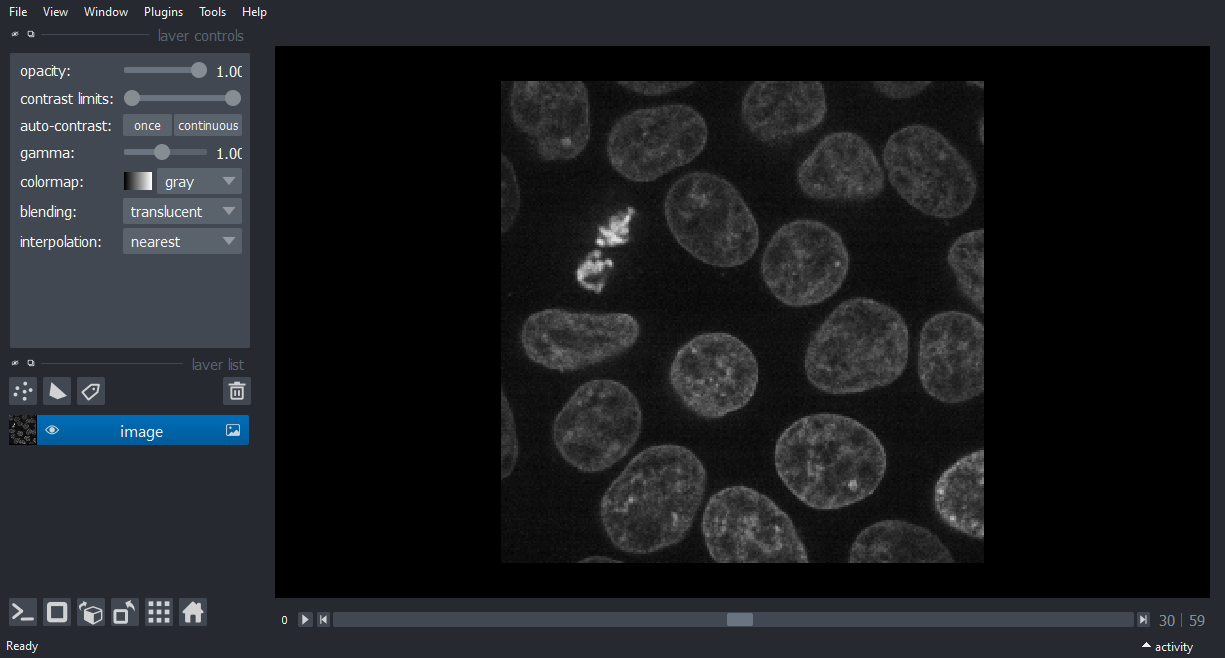

In [3]:
image = cells3d()[:,1]

viewer.add_image(image)
napari.utils.nbscreenshot(viewer)

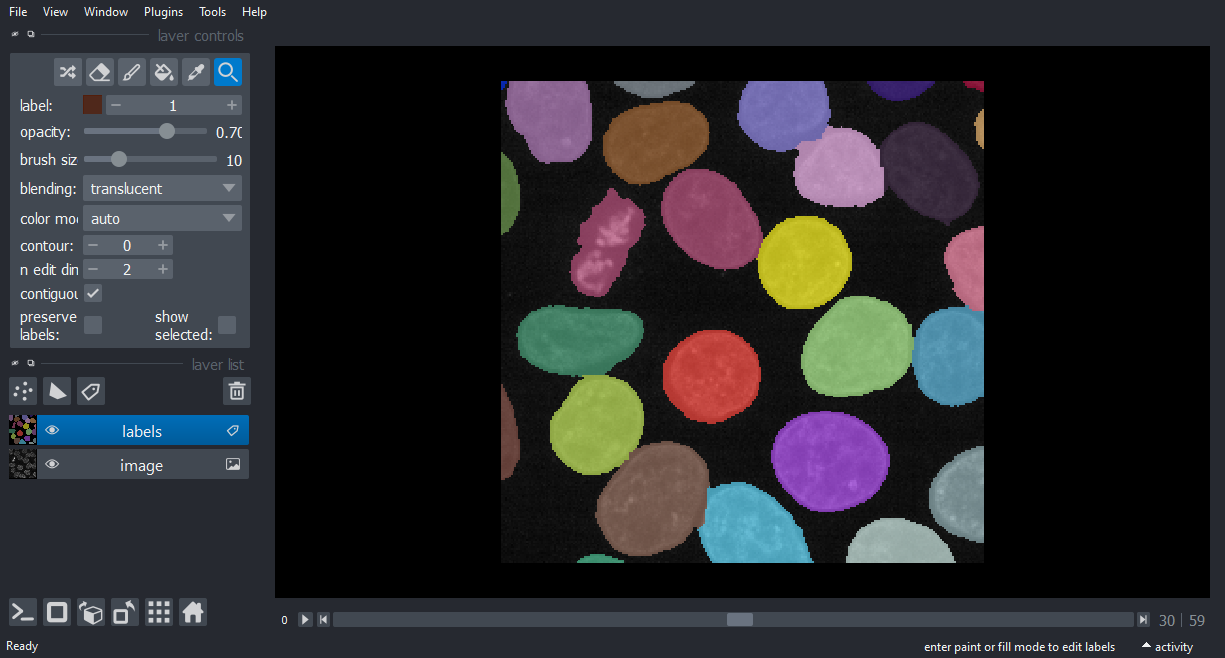

In [4]:
blurred = gaussian(image, 1, preserve_range=True)
binary = blurred > 6000
labels = touching_objects_labeling(binary)

labels_layer = viewer.add_labels(labels)

napari.utils.nbscreenshot(viewer)

## Feature extraction 
We next extract features using [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing) and send the result as table to napari.

In [5]:
statistics = label_statistics(image, labels, shape=True)

pd.DataFrame(statistics)

,label,maximum,mean,median,minimum,sigma,sum,variance,elongation,feret_diameter,flatness,roundness,equivalent_ellipsoid_diameter_0,equivalent_ellipsoid_diameter_1,equivalent_ellipsoid_diameter_2,equivalent_spherical_perimeter,equivalent_spherical_radius,number_of_pixels,number_of_pixels_on_border
0,1,6497.0,6497.000000,6527.900391,6497.0,0.000000,6497.0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.835976,0.620350,1,1
1,2,6070.0,6070.000000,6015.908203,6070.0,0.000000,6070.0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.835976,0.620350,1,1
2,3,8583.0,6576.625000,6783.896484,4695.0,719.021339,315678.0,5.169917e+05,1.833872,11.874342,1.582815,0.0,2.712301,4.293070,7.872938,63.872162,2.254503,48,33
3,4,7160.0,6765.000000,7039.892578,6212.0,493.354842,20295.0,2.433990e+05,1.732051,1.414214,0.000000,0.0,0.000000,0.000000,0.000000,10.059235,0.894700,3,3
4,5,8962.0,6769.166667,6527.900391,4837.0,1310.103524,81230.0,1.716371e+06,2.515872,5.656854,1.573463,0.0,1.543809,2.429127,6.111373,25.347684,1.420248,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,458,8346.0,7196.000000,7039.892578,6591.0,791.127887,28784.0,6.258833e+05,1.000000,1.414214,0.000000,0.0,0.000000,0.000000,0.000000,12.185896,0.984745,4,4
458,459,8061.0,6887.750000,7295.888672,5548.0,1048.434508,27551.0,1.099215e+06,2.618034,2.236068,0.000000,0.0,0.000000,0.000000,0.000000,12.185896,0.984745,4,4
459,460,6734.0,6734.000000,6783.896484,6734.0,0.000000,6734.0,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.835976,0.620350,1,1
460,461,7350.0,6899.500000,7295.888672,6449.0,637.103210,13799.0,4.059005e+05,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,7.676633,0.781593,2,2


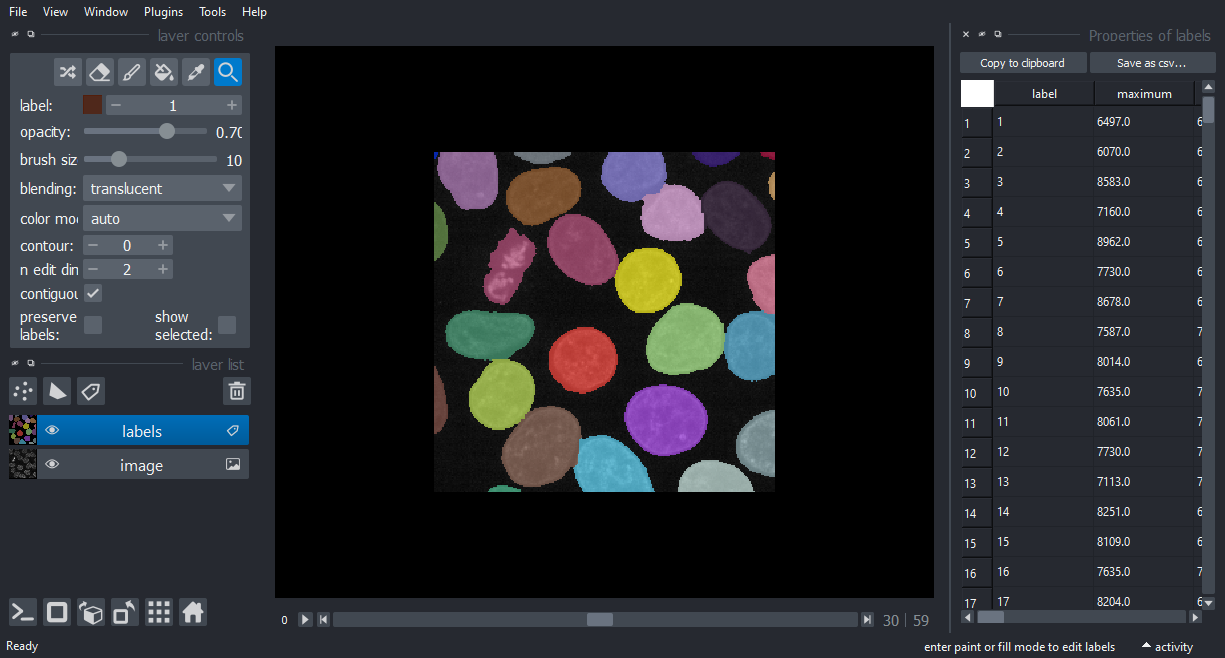

In [6]:
labels_layer.features = statistics

add_table(labels_layer, viewer)

napari.utils.nbscreenshot(viewer)

## Exercise
Double-click a column header in the napari viewer and execute the next cell afterwards.

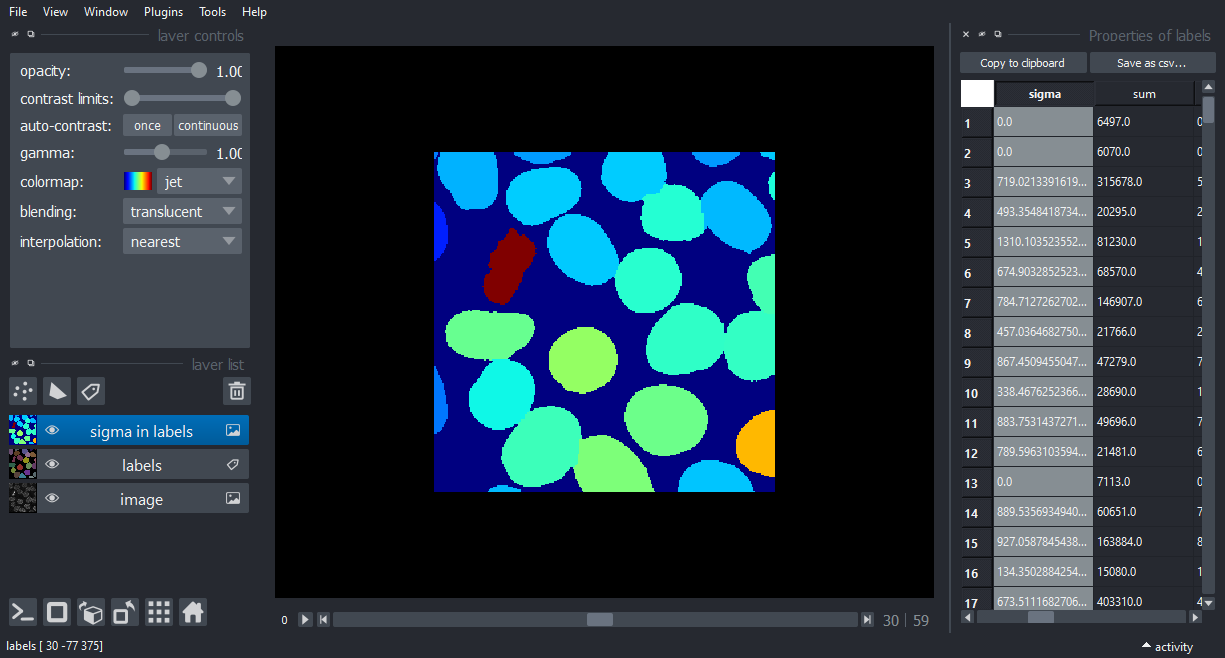

In [8]:
napari.utils.nbscreenshot(viewer)